In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)

# Reading Data

In [2]:
WORKDIR = '/code/'

In [3]:
train = pd.read_csv(WORKDIR+'/data/train.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train = train.drop(columns='Id')

# Target Variable

## Checking for missing values on the target variable

In [6]:
train['SalePrice'].isna().any()

False

No missing values on the training target vareable

## Sales price histogram

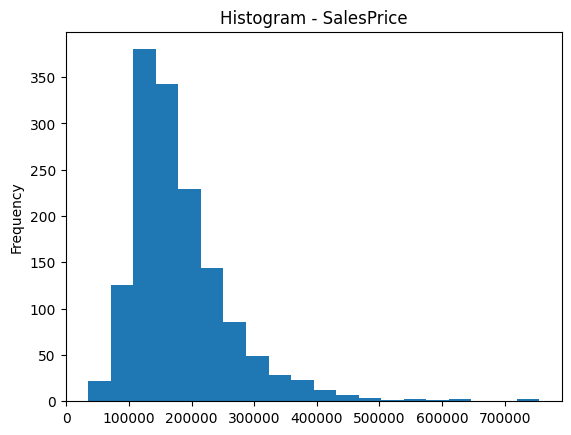

In [7]:
train['SalePrice'].plot.hist(bins=20)
plt.title('Histogram - SalesPrice')
plt.show()

Test ideia - Maybe a transformation of the target variable into a more normal distrubution can improve the results of the model. 

# Features Analysis

## Missing values

In [8]:
features_with_na = [feat for feat in train.columns if train[feat].isna().any()]

N = train.shape[0]

for feature_na in features_with_na:
    missing_percentage = round(train[feature_na].isna().sum()/N * 100, 2)
    print(f'{feature_na} - {missing_percentage} % of missing values')

LotFrontage - 17.74 % of missing values
Alley - 93.77 % of missing values
MasVnrType - 59.73 % of missing values
MasVnrArea - 0.55 % of missing values
BsmtQual - 2.53 % of missing values
BsmtCond - 2.53 % of missing values
BsmtExposure - 2.6 % of missing values
BsmtFinType1 - 2.53 % of missing values
BsmtFinType2 - 2.6 % of missing values
Electrical - 0.07 % of missing values
FireplaceQu - 47.26 % of missing values
GarageType - 5.55 % of missing values
GarageYrBlt - 5.55 % of missing values
GarageFinish - 5.55 % of missing values
GarageQual - 5.55 % of missing values
GarageCond - 5.55 % of missing values
PoolQC - 99.52 % of missing values
Fence - 80.75 % of missing values
MiscFeature - 96.3 % of missing values


## Relation of missing values with dependent variable

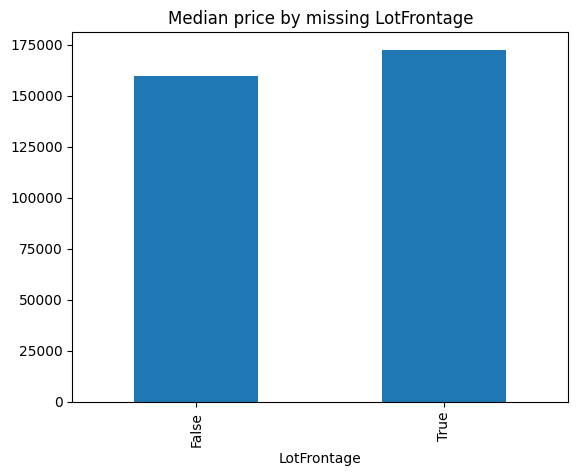

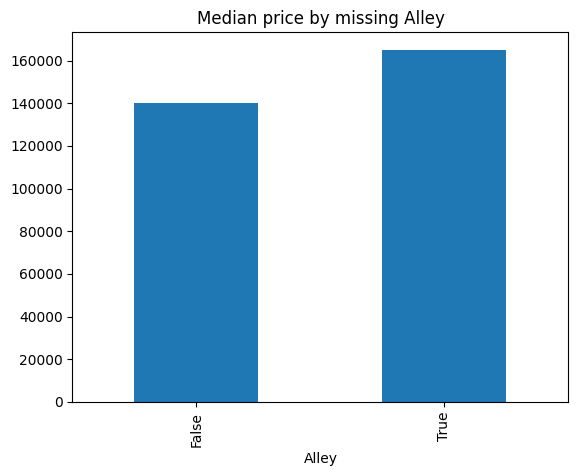

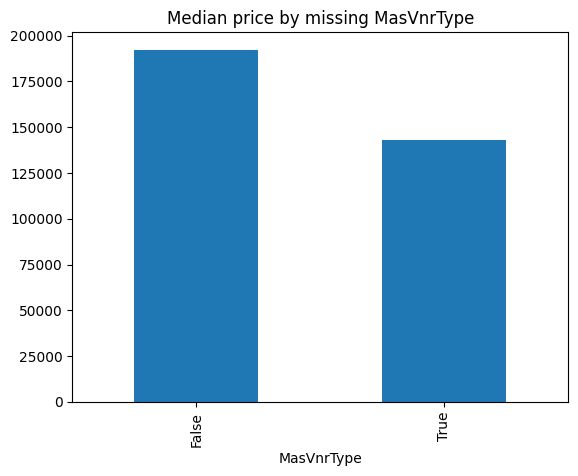

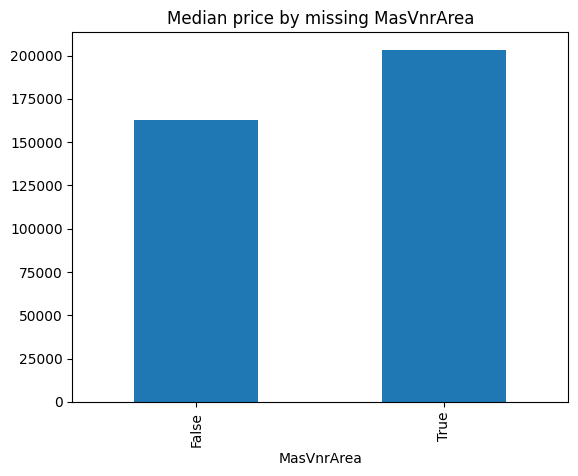

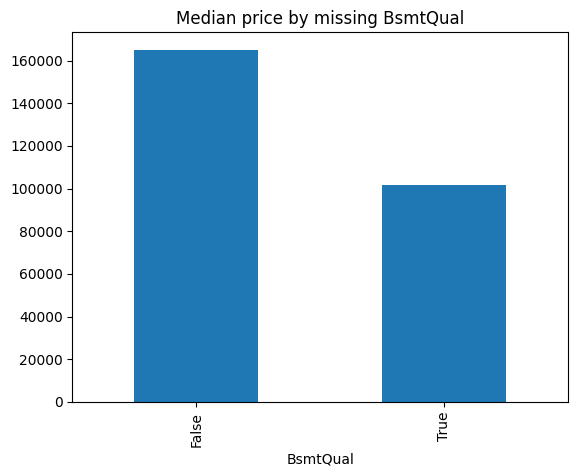

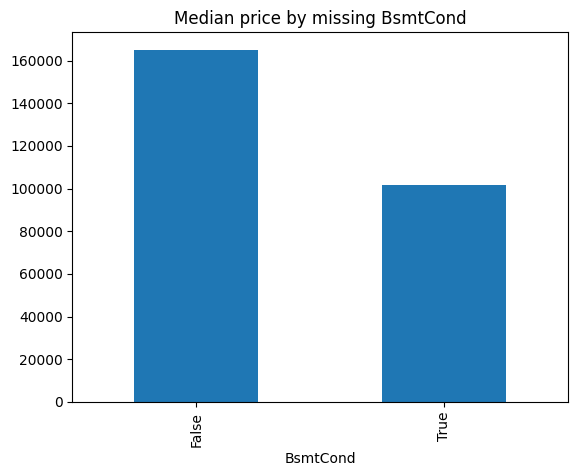

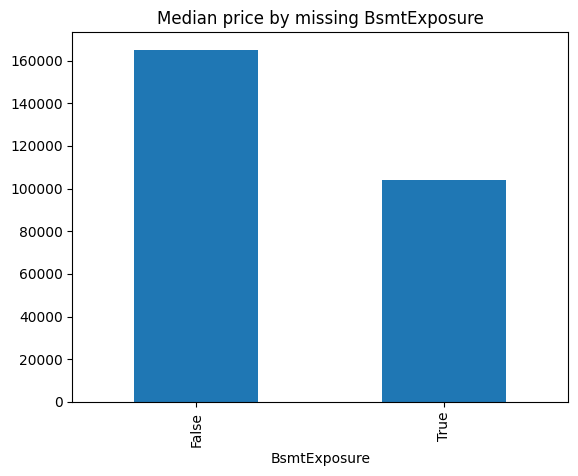

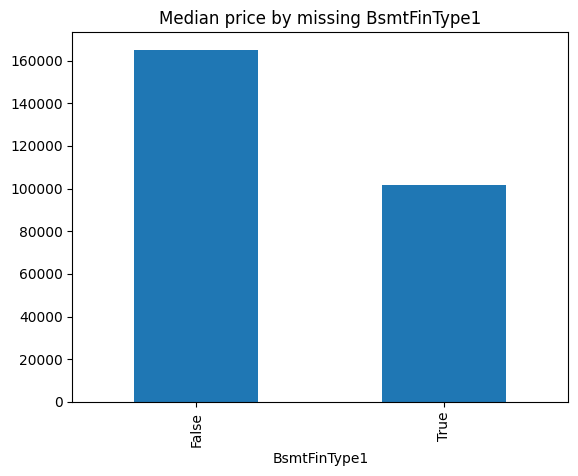

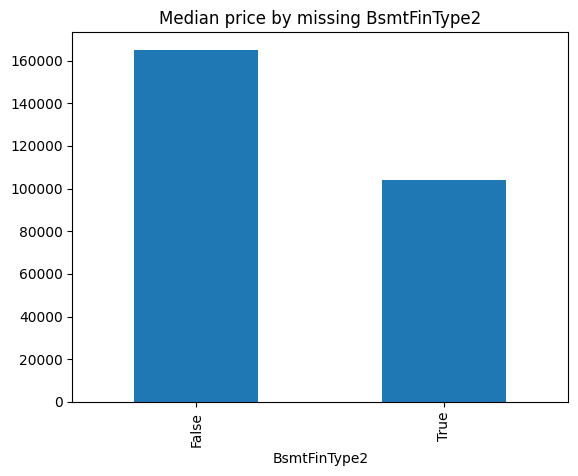

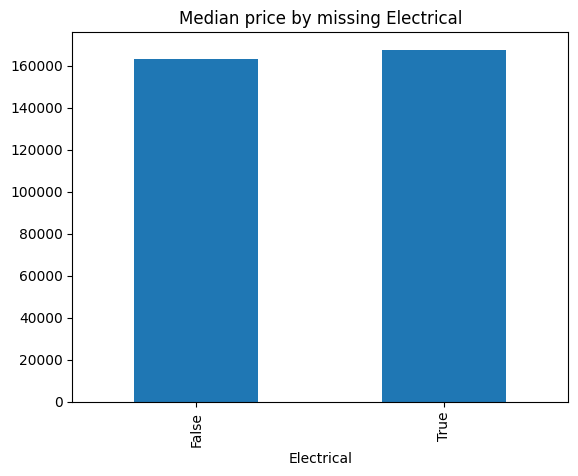

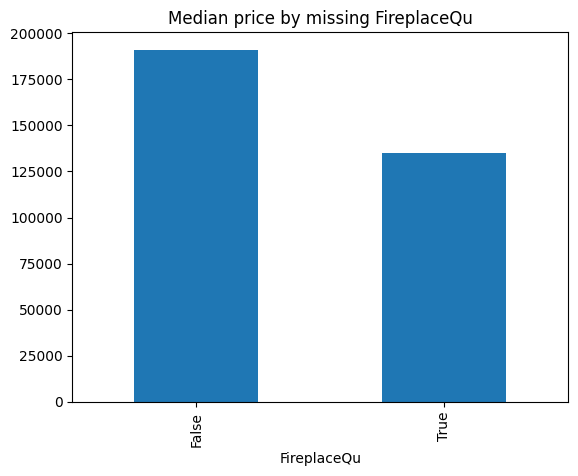

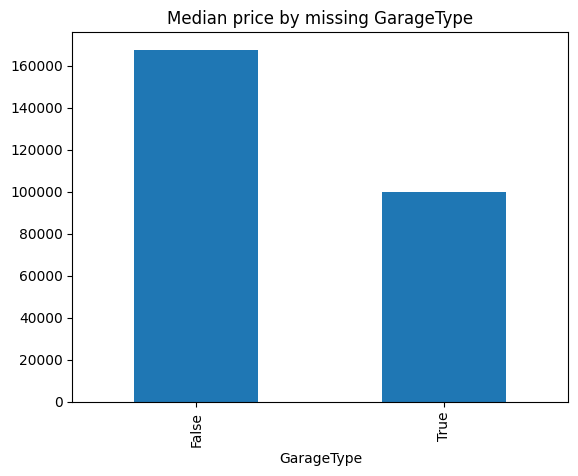

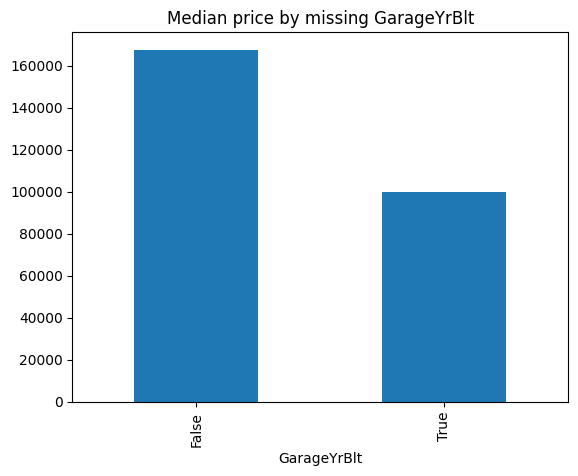

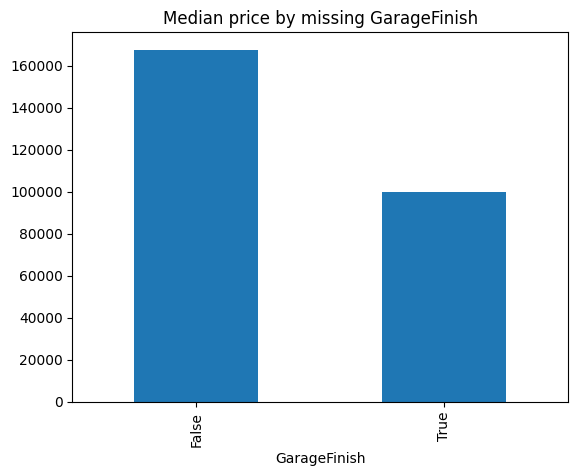

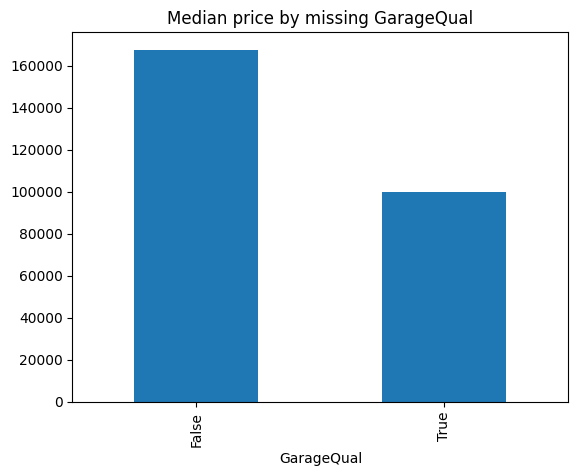

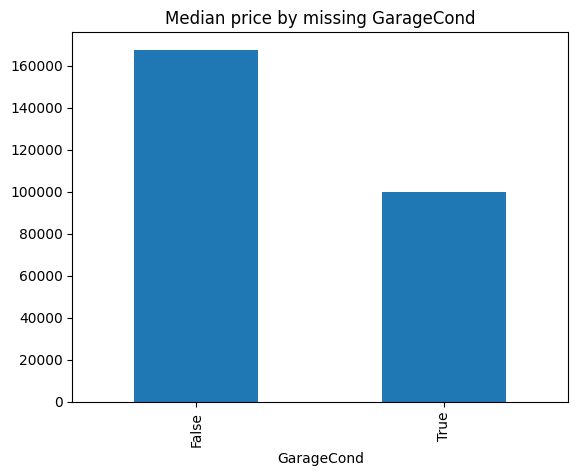

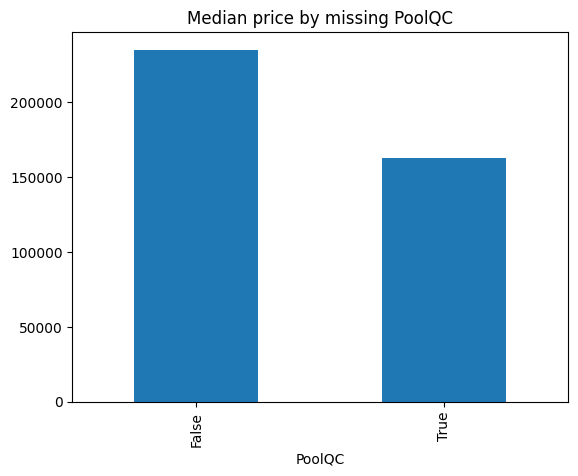

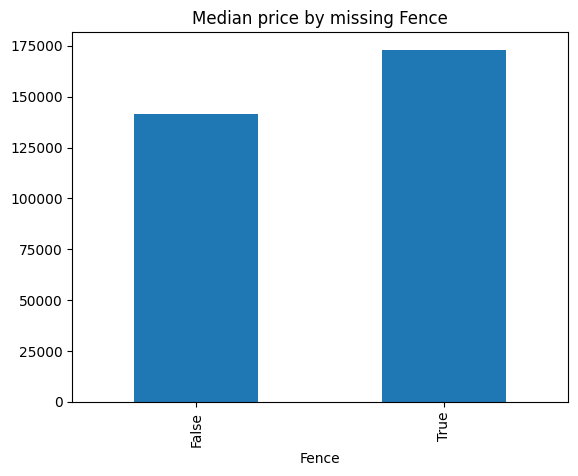

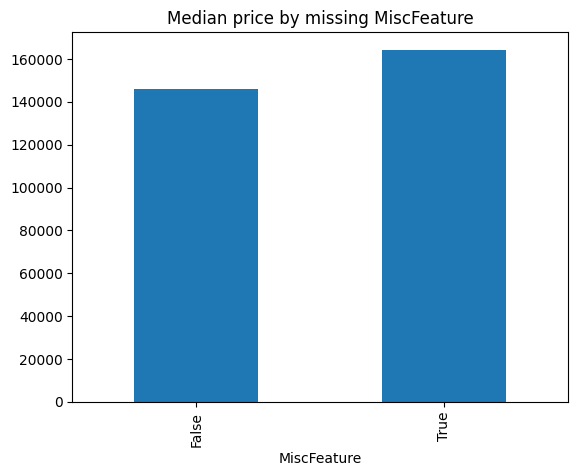

In [9]:
for feature_na in features_with_na:

    data_copy = train.copy()

    data_copy[feature_na] = data_copy[feature_na].isna()

    fig = plt.figure()
    data_copy.groupby(by=feature_na)['SalePrice'].median().plot(kind='bar')
    plt.title(f'Median price by missing {feature_na}')
    plt.show()
    plt.close(fig)

For the majority of the variables it appears to have a difference between Missing and Non-missing values or the sale price.

# Numeric and categorical features

In [10]:
numerical_features = train.select_dtypes(include='number').columns
categorical_features = train.select_dtypes(exclude='number').columns

## Numeric features

In [11]:
train[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


There are some "numerical" features that are related with dates. We could have a distinct analysis for these features.

### Date "numeric" Features

In [12]:
date_features = [feature for feature in numerical_features if ('Year' in feature) or ('Yr' in feature)]

In [13]:
train[date_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


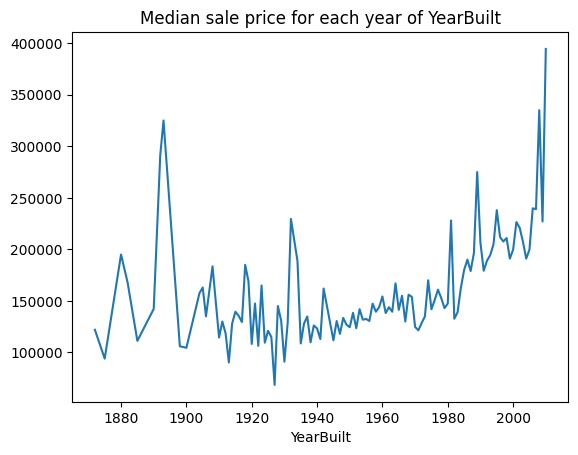

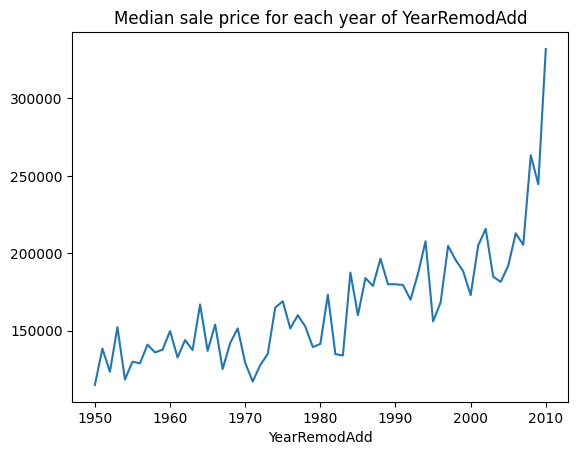

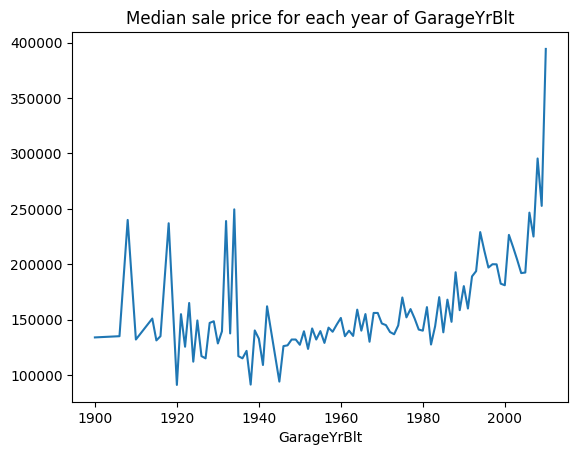

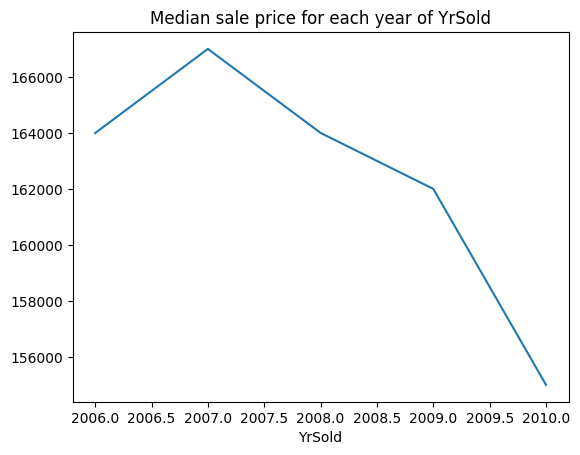

In [14]:
for feature in date_features:
    fig = plt.figure()
    train.groupby(by=[feature])['SalePrice'].median().plot()
    plt.title(f"Median sale price for each year of {feature}")
    plt.show()
    plt.close(fig)

Unexpected behavior for the YrSold feature, we expected that the price would increase with time. 

Let's check the difference among the other time related variables and this one.

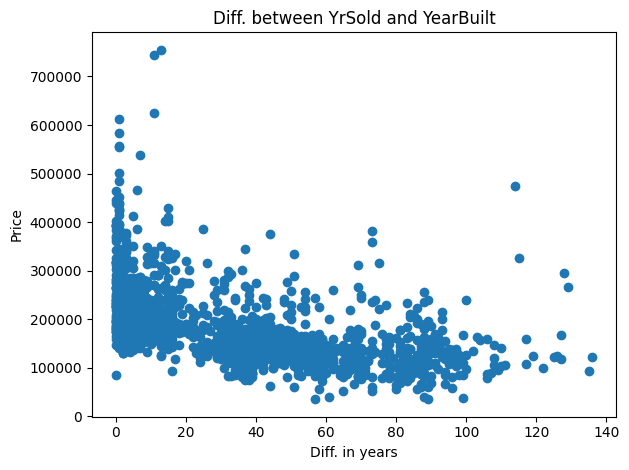

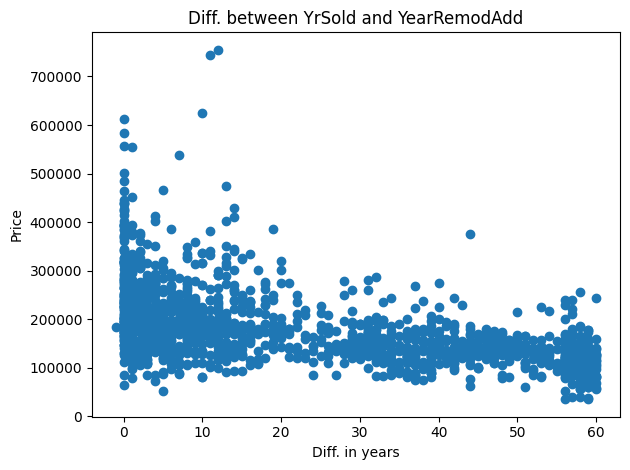

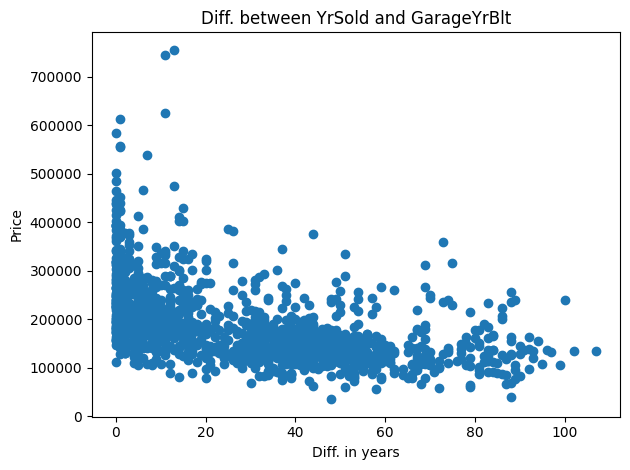

In [15]:
for feature in date_features:
    if feature != "YrSold":
        fig = plt.figure()
        plt.scatter(x= (train['YrSold'] - train[feature]), y= train['SalePrice'])
        plt.title(f"Diff. between YrSold and {feature}")
        plt.xlabel("Diff. in years")
        plt.ylabel("Price")
        plt.tight_layout()
        plt.show()
        plt.close(fig)

## Discrete and continuous numerical features

In [16]:
numerical_features = list(set(numerical_features) - set(date_features) - set(['SalePrice']))
threshold = N*5/100
index_discrete_features = (train[numerical_features].nunique() < threshold)


In [17]:
discrete_numerical_features = train[numerical_features].columns[index_discrete_features]
continuous_numerical_features = train[numerical_features].columns[~index_discrete_features]

In [18]:
len(numerical_features) == len(discrete_numerical_features)+len(continuous_numerical_features)

True

### Discrete numerical feature analysis

<Figure size 1500x500 with 0 Axes>

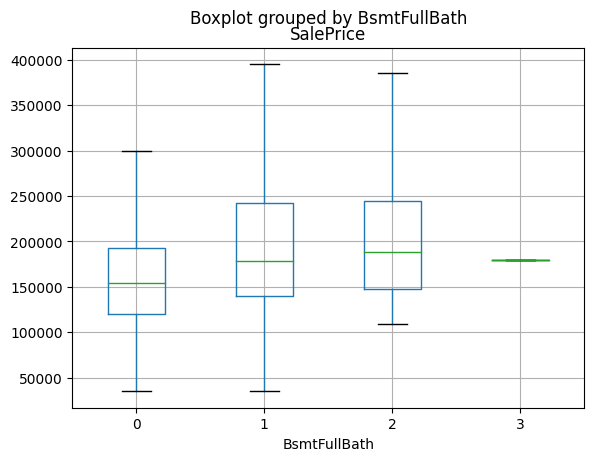

<Figure size 1500x500 with 0 Axes>

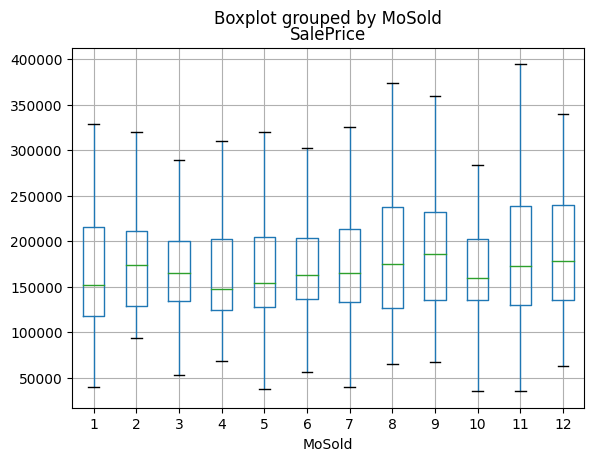

<Figure size 1500x500 with 0 Axes>

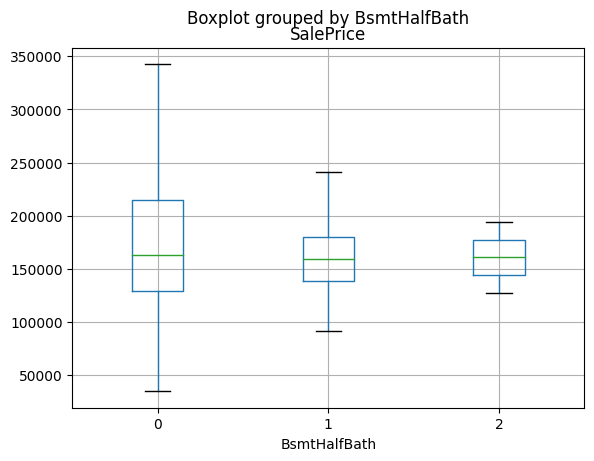

<Figure size 1500x500 with 0 Axes>

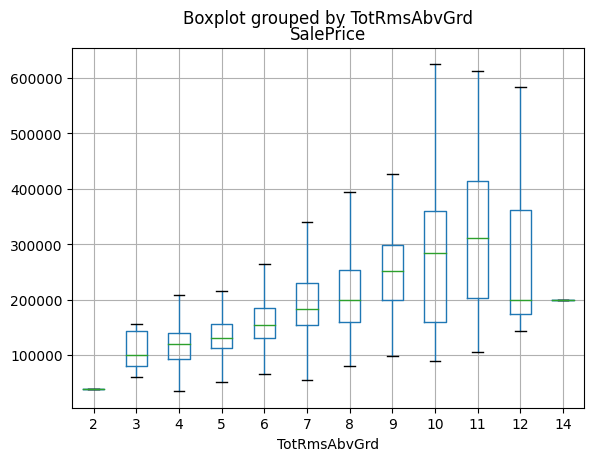

<Figure size 1500x500 with 0 Axes>

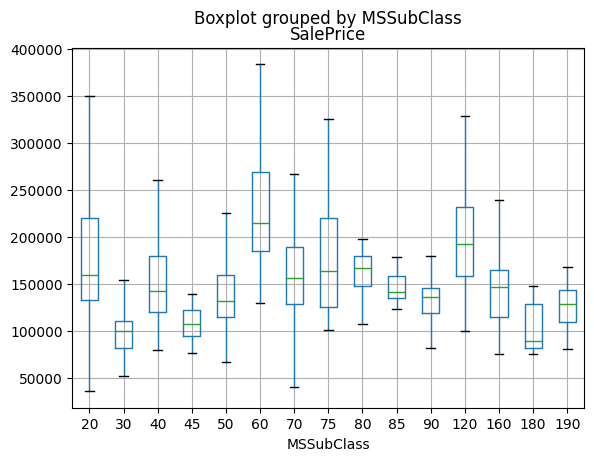

<Figure size 1500x500 with 0 Axes>

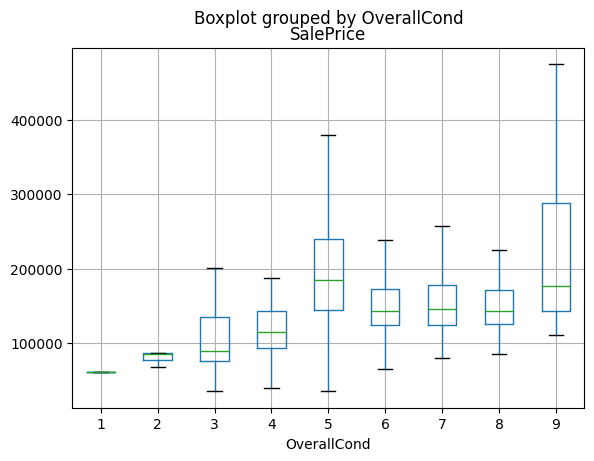

<Figure size 1500x500 with 0 Axes>

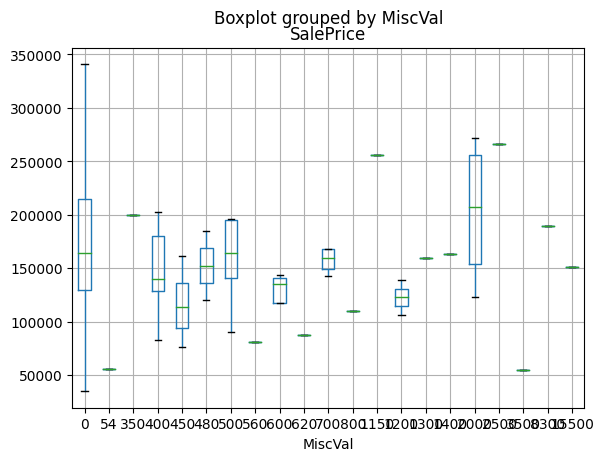

<Figure size 1500x500 with 0 Axes>

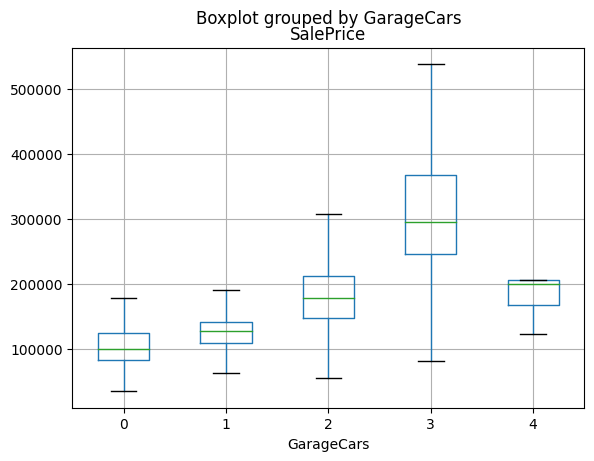

<Figure size 1500x500 with 0 Axes>

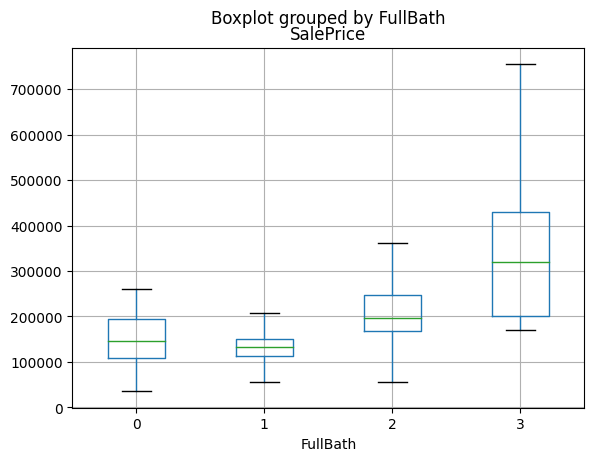

<Figure size 1500x500 with 0 Axes>

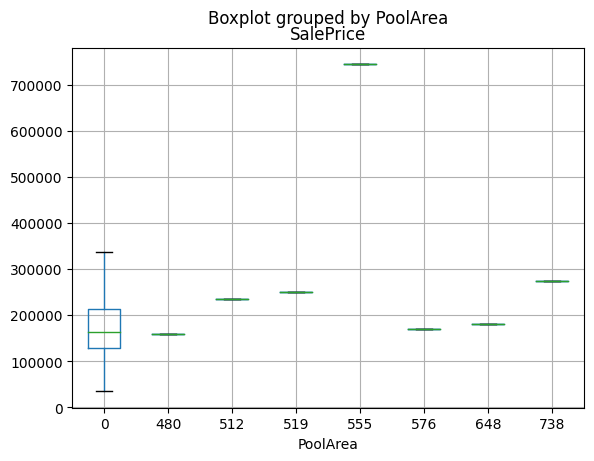

<Figure size 1500x500 with 0 Axes>

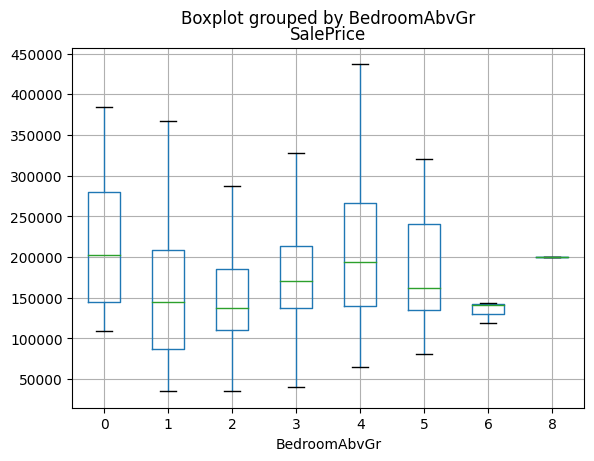

<Figure size 1500x500 with 0 Axes>

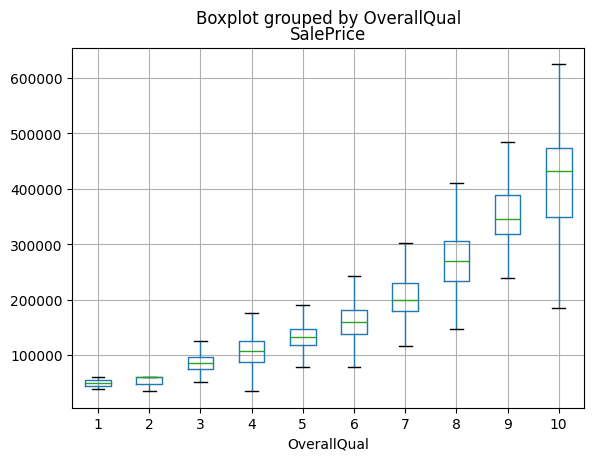

<Figure size 1500x500 with 0 Axes>

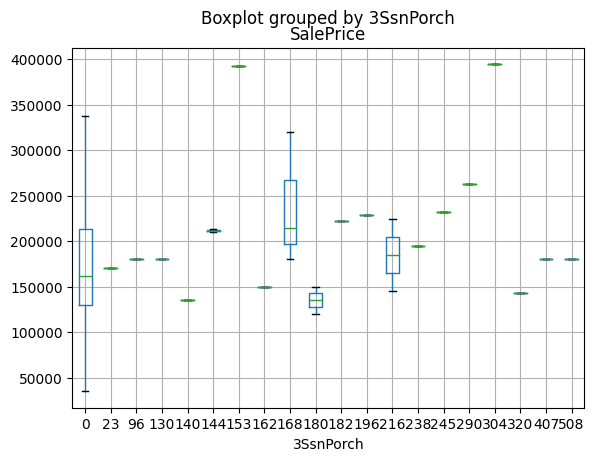

<Figure size 1500x500 with 0 Axes>

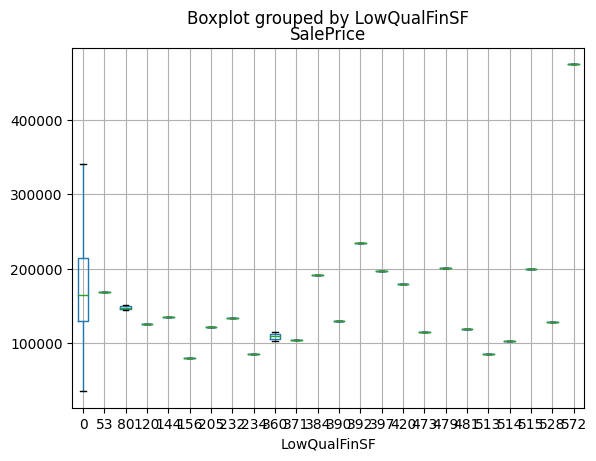

<Figure size 1500x500 with 0 Axes>

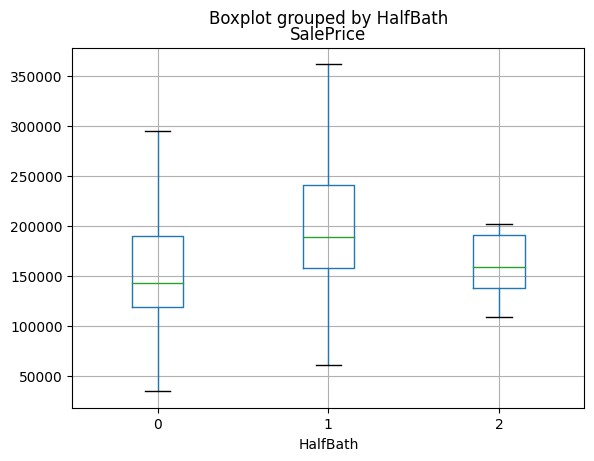

<Figure size 1500x500 with 0 Axes>

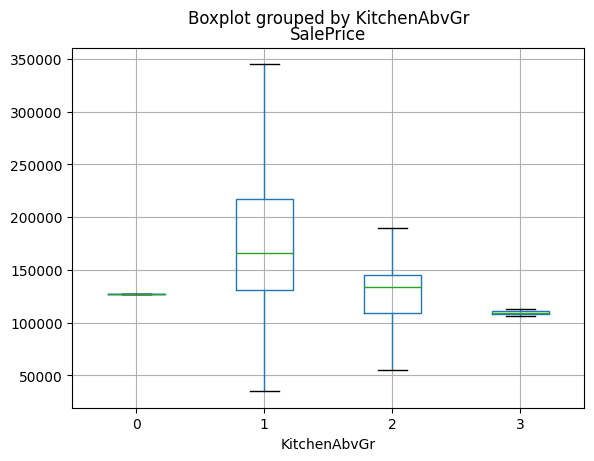

<Figure size 1500x500 with 0 Axes>

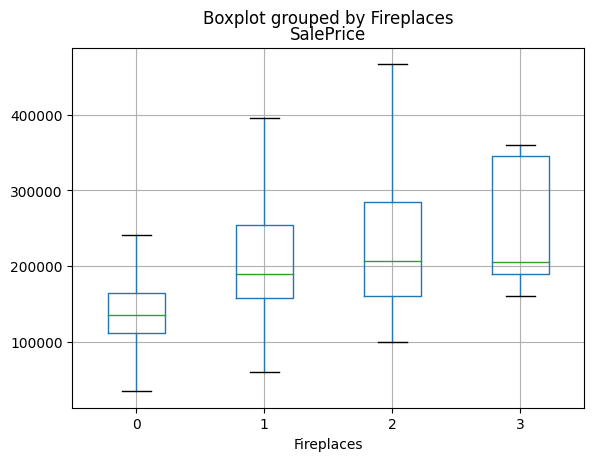

In [25]:
for feature in discrete_numerical_features:
    fig=plt.figure(figsize=(15, 5))
    train.boxplot(column='SalePrice', by=feature, showfliers=False)
    plt.show()
    plt.close(fig)

### Continuous numerical feature

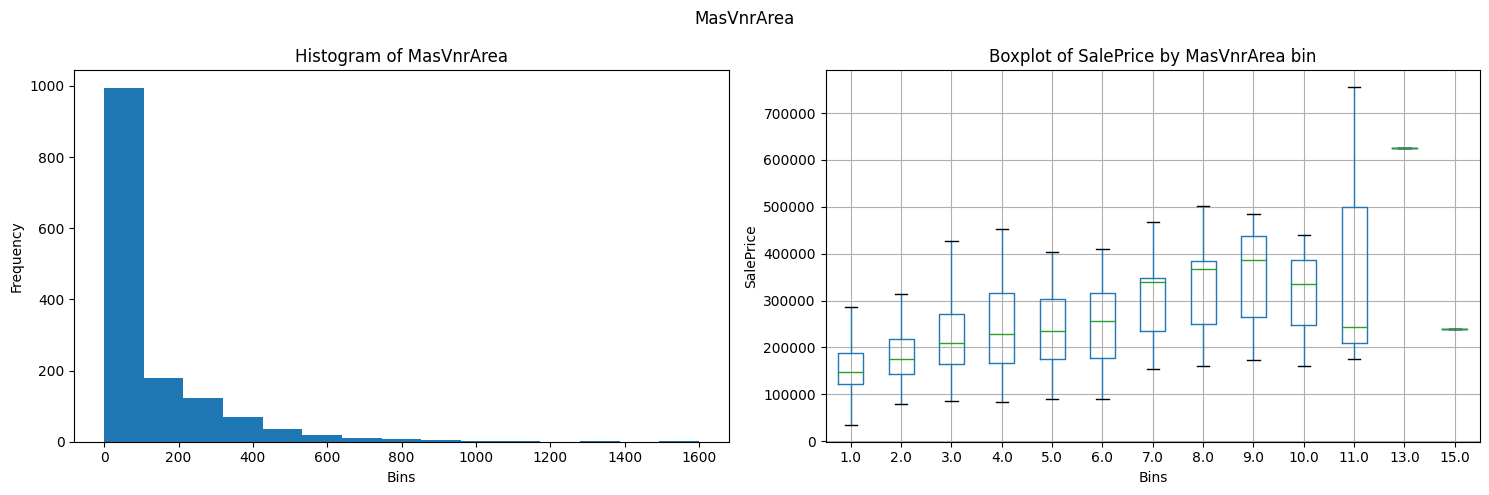

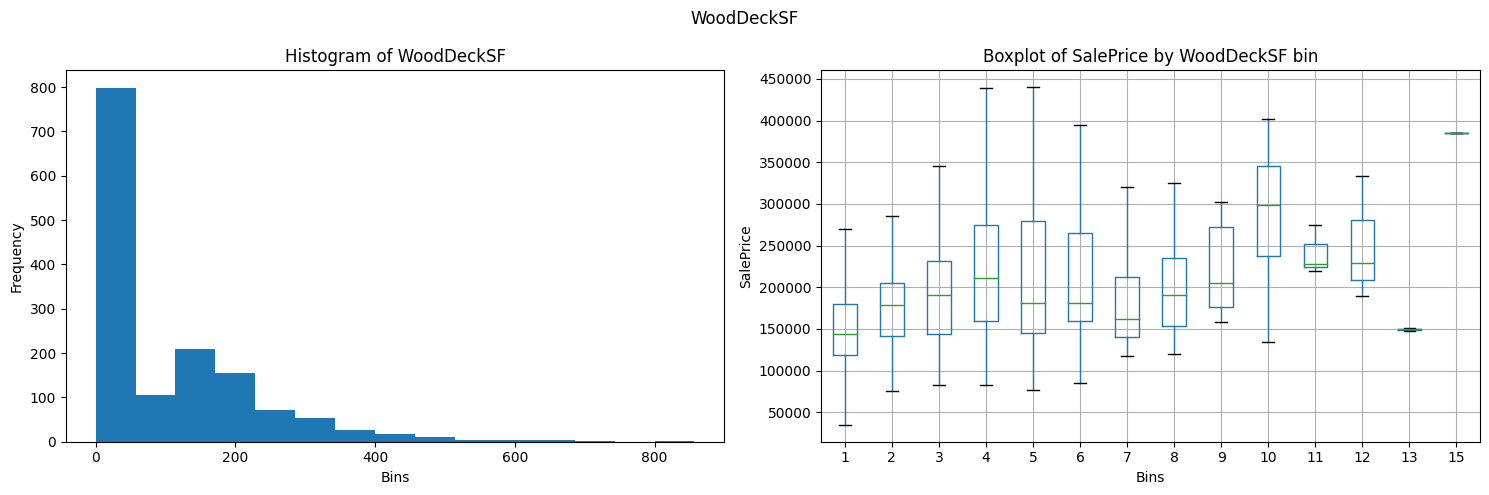

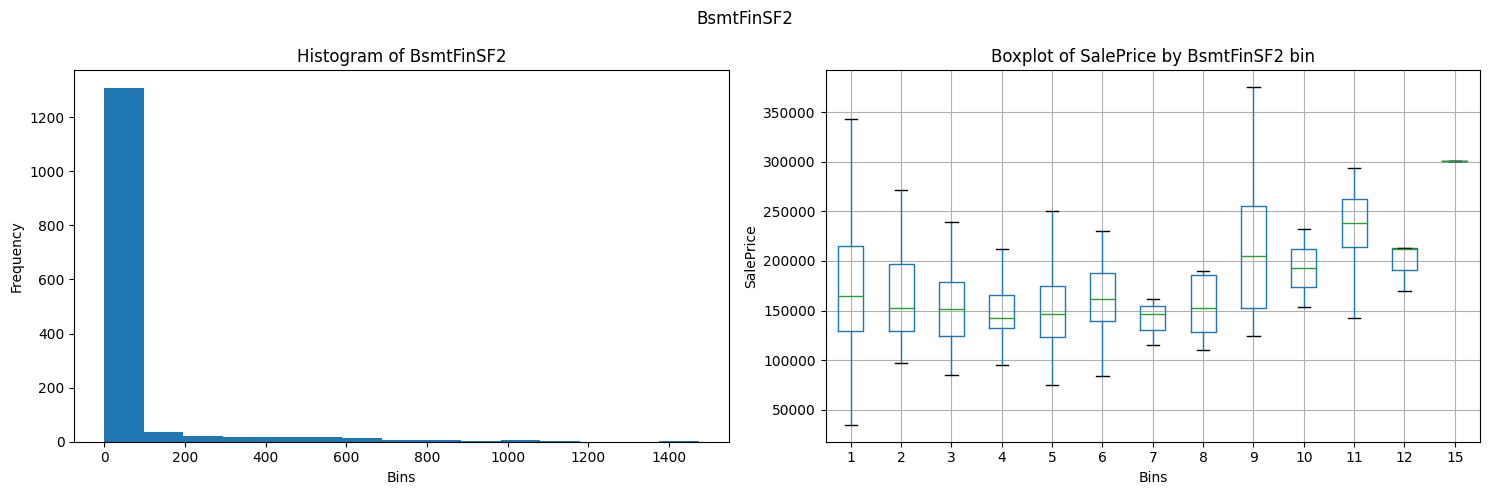

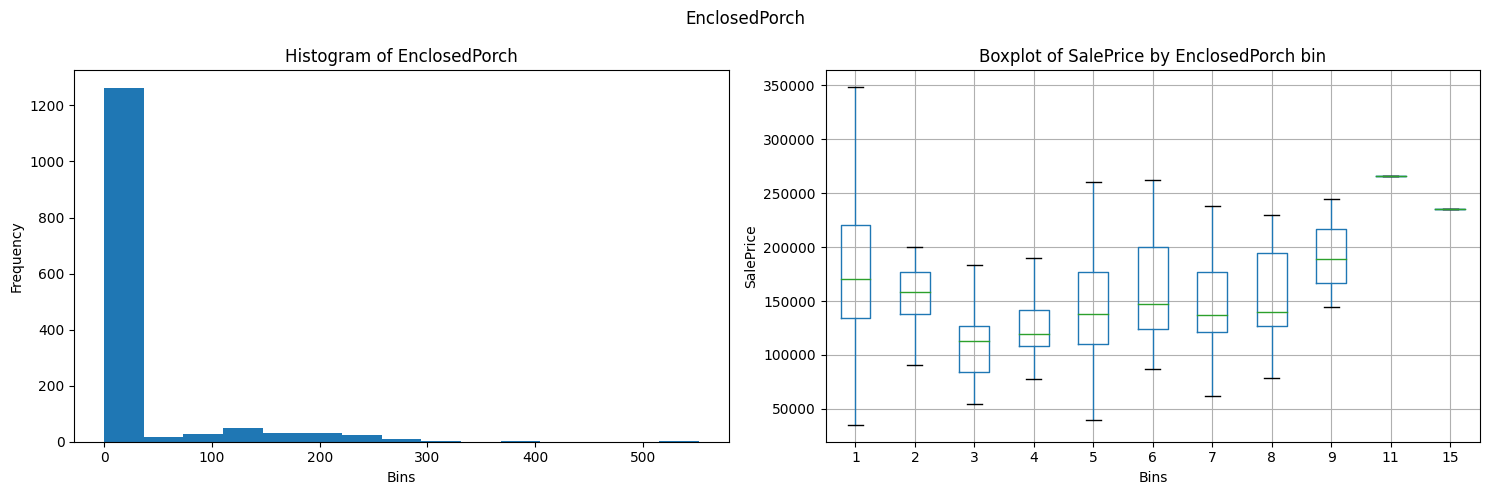

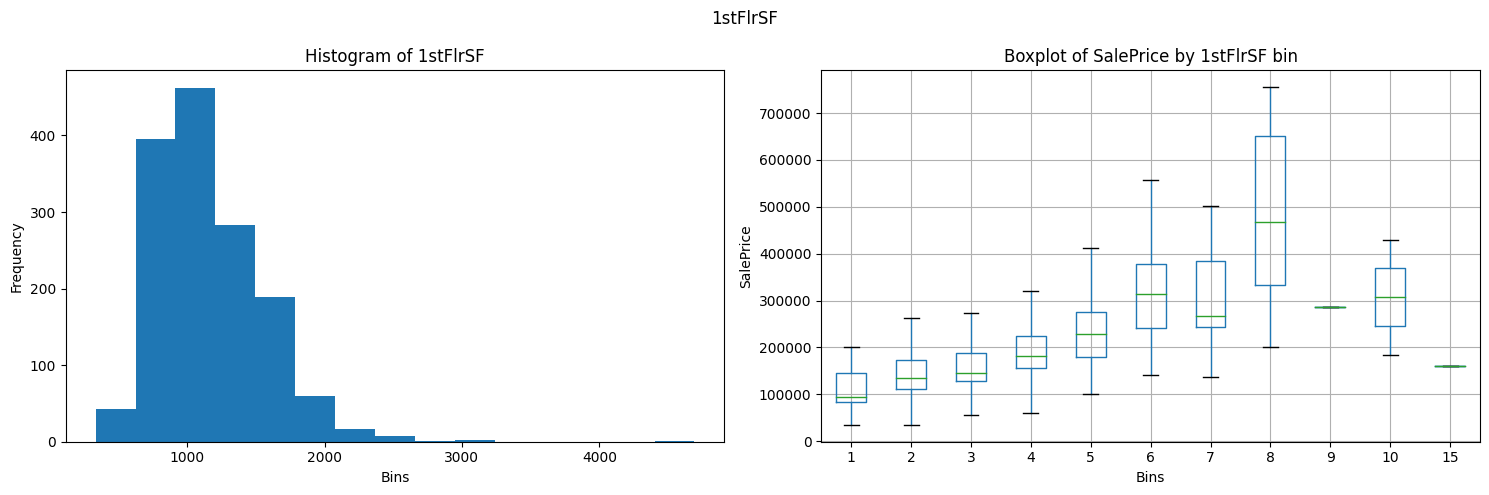

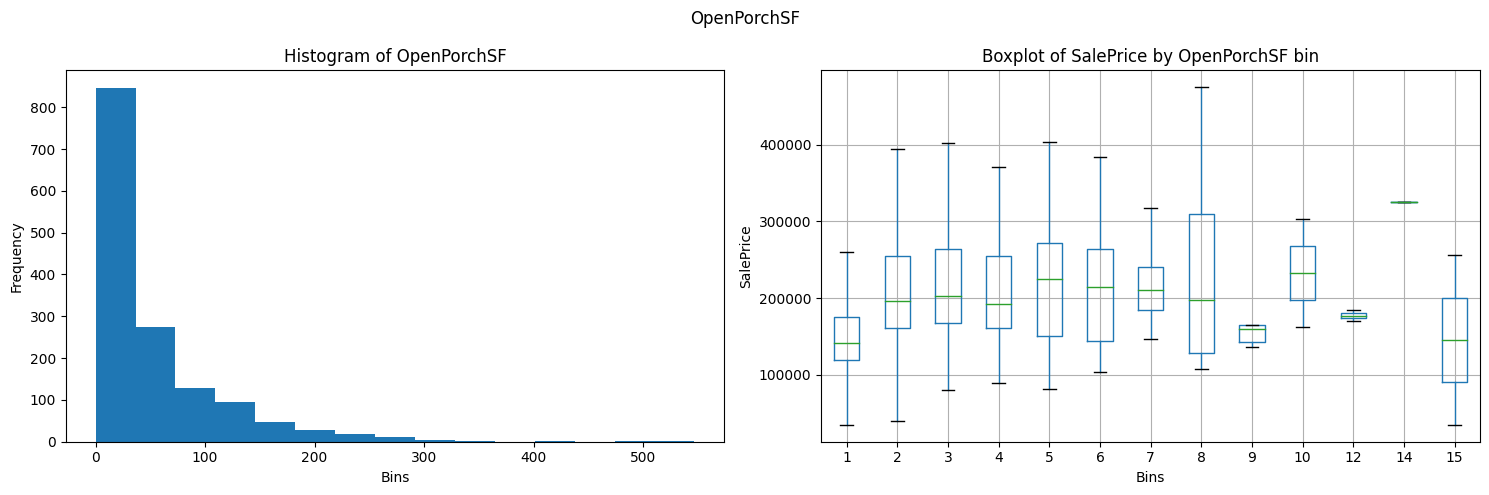

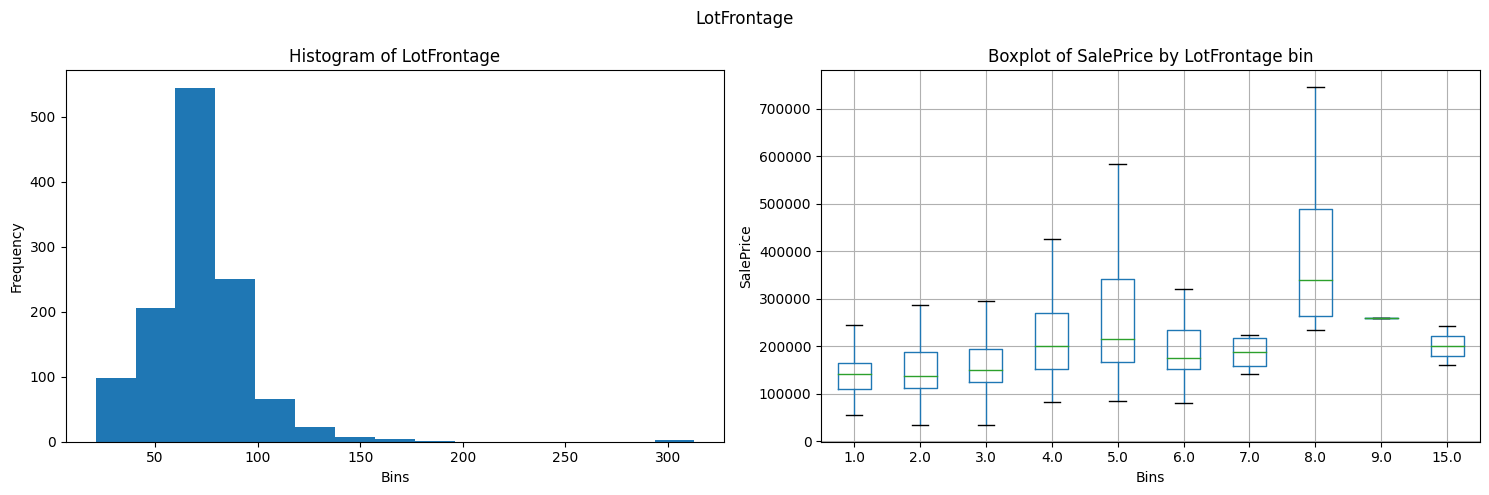

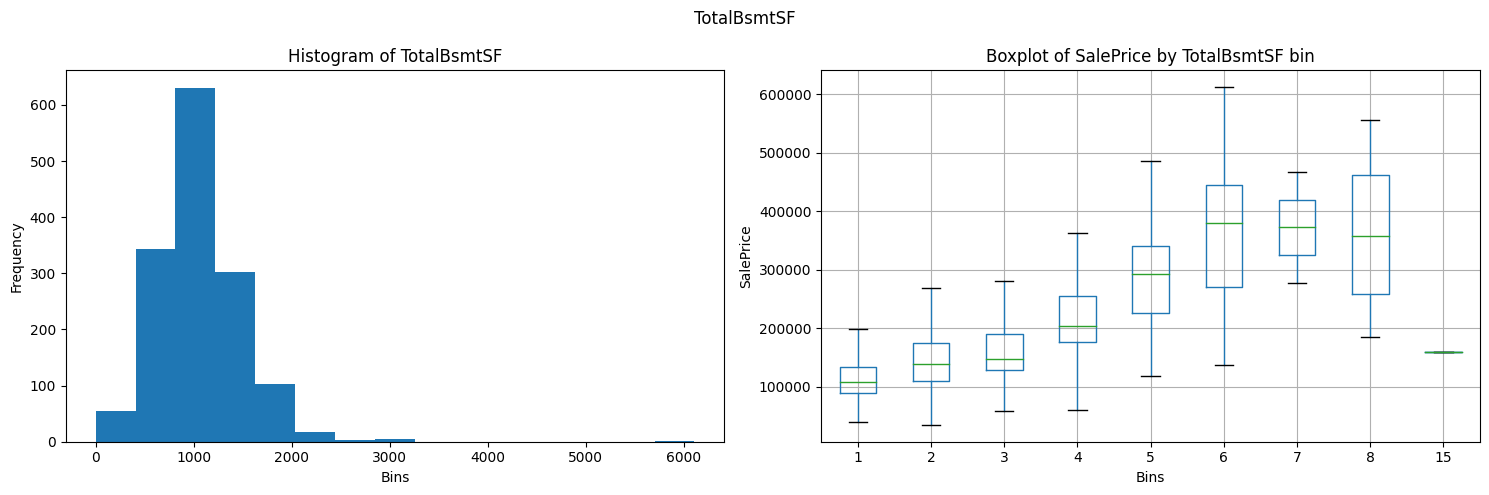

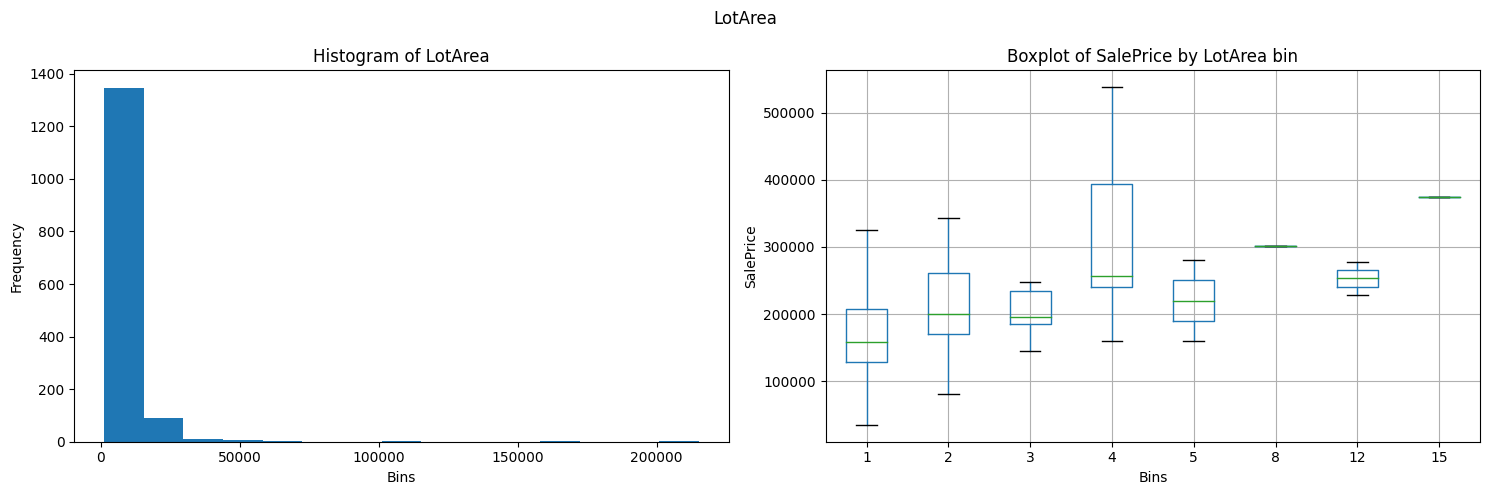

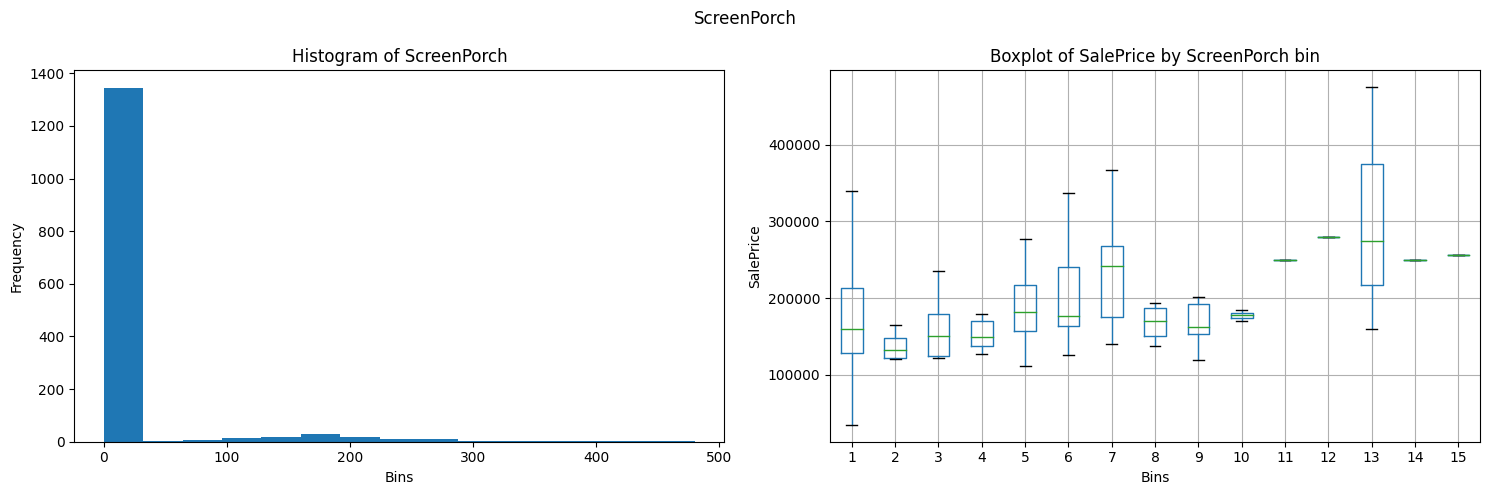

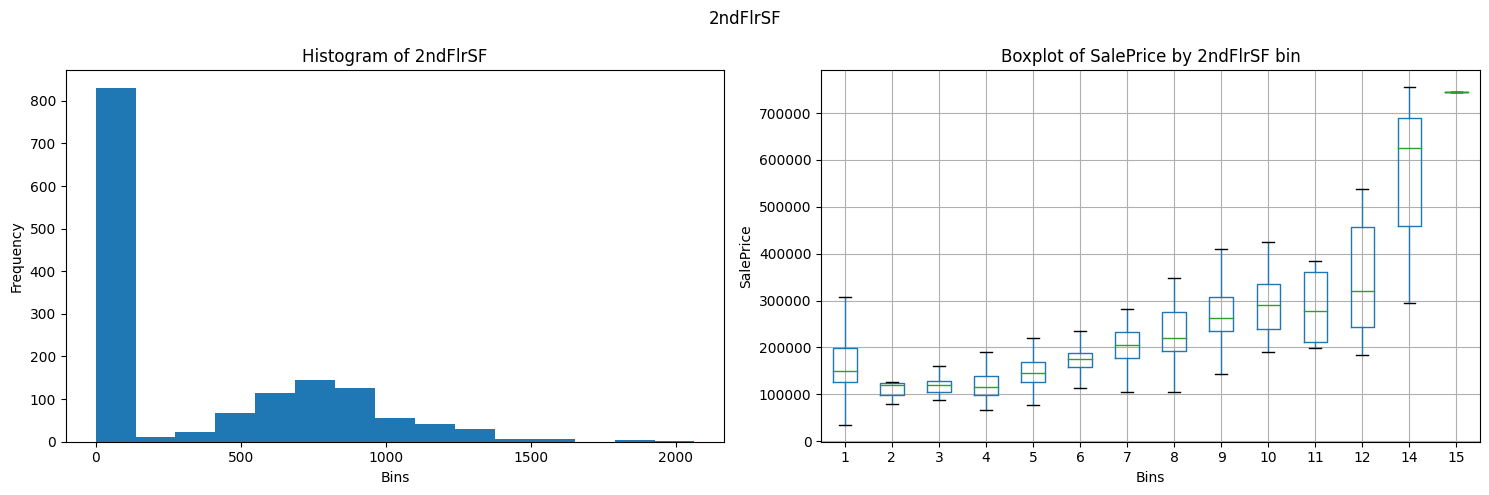

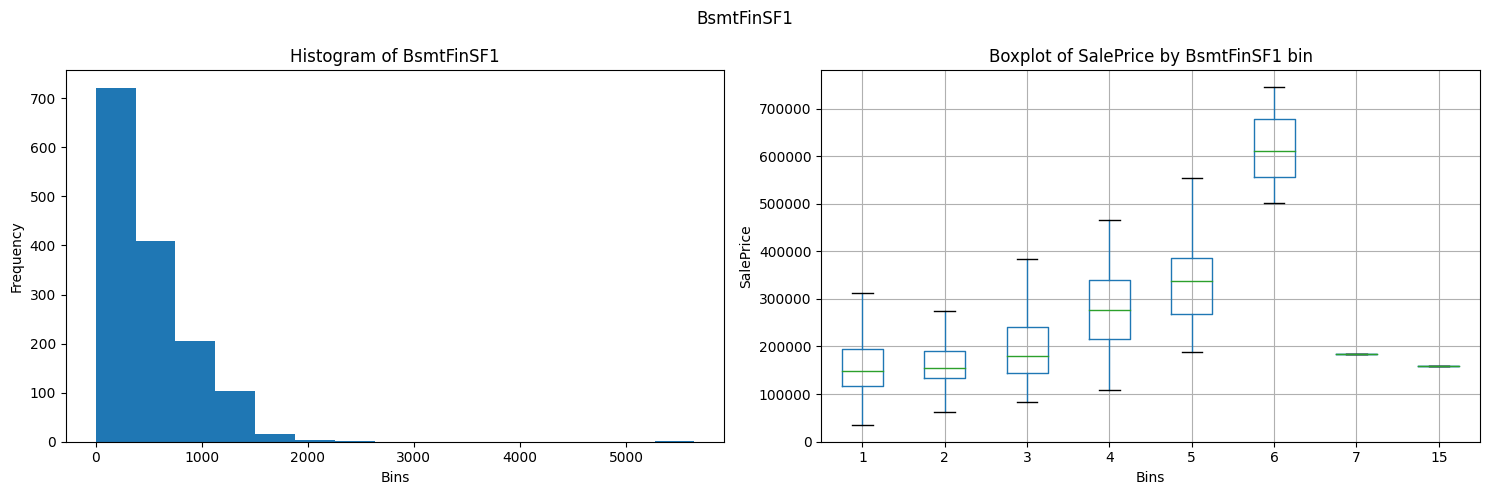

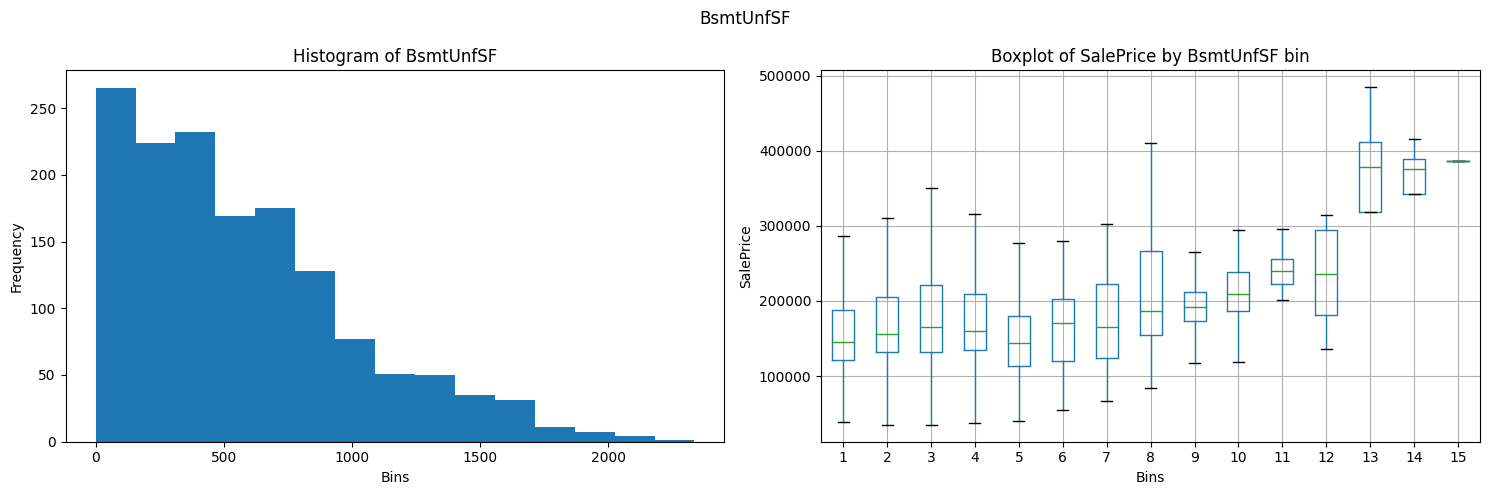

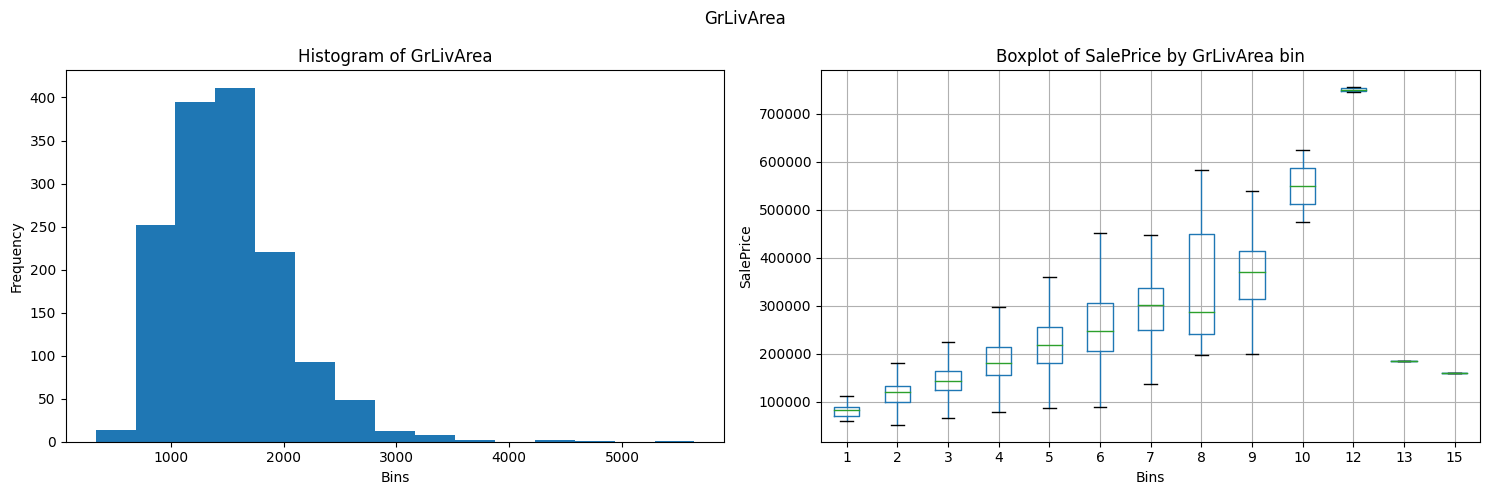

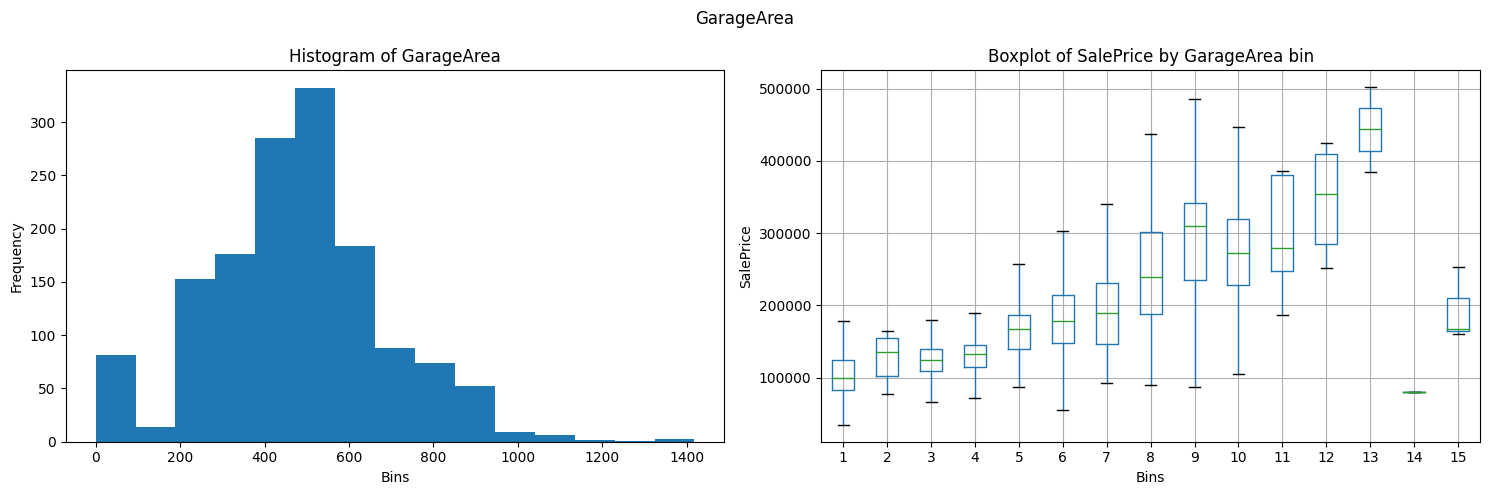

In [23]:
num_bins = 15

train_copy = train.copy()

for feature in continuous_numerical_features:

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    train_copy[feature].plot.hist(bins = num_bins, ax=axes[0])
    axes[0].set_title(f"Histogram of {feature}")
    axes[0].set_xlabel("Bins")

    train_copy[f'{feature}_cut'] = (pd.cut(train_copy[feature], bins=num_bins, labels=False) + 1)
    train_copy.boxplot(column='SalePrice', by=f'{feature}_cut', showfliers=False, ax=axes[1])
    axes[1].set_xlabel('Bins')
    axes[1].set_ylabel('SalePrice')
    axes[1].set_title(f'Boxplot of SalePrice by {feature} bin')

    fig.suptitle(f'{feature}')
    fig.tight_layout()

    plt.show()
    plt.close(fig)

del train_copy

## Categorical features

In [ ]:
train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
